# Tratamento dos Dados
Agora o processo se dá em fazer a análise dos dados e selecionar as variáveis preditoras.

<div align = "center">
    <img src = "https://github.com/AndersonAyache/AluraVoz/blob/main/IMG/Logo_Alura_Voz.png?raw=true" alt = "Alura Voz"/>
</div>

In [15]:
# importando as bibliotecas
# pandas
import pandas as pd

# gráficos
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.subplots import make_subplots

import plotly.graph_objects as go
import plotly.express as px
import plotly as pl

In [16]:
# importando o DataFrame já tratato
clientes = pd.read_json('../dados/Telco-Customer-Churn-Limpo.json')

In [17]:
# configurações inicias
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', None)

In [18]:
# visualizando o DataFrame
clientes.head()

,Churn,genero,senior,conjuge,dependentes,permanencia,ServicoTelefonico,MultiplasLinhas,ServicoInternet,SeguroOnline,OnlineBackup,ProtecaoDoDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes,contrato,FaturaOnline,MetodoDePagamento,GastoMensal,GastoTotal,GastoDiario
0,Não,Mulher,0,Sim,Sim,9,Sim,Não,DSL,Não,Sim,Não,Sim,Sim,Não,UmAno,Sim,EnvioDeCheque,65.6,593.30,2.19
1,Não,Homem,0,Não,Não,9,Sim,Sim,DSL,Não,Não,Não,Não,Não,Sim,Mensal,Não,EnvioDeCheque,59.9,542.40,2.00
2,Sim,Homem,0,Não,Não,4,Sim,Não,FibraOptica,Não,Não,Sim,Não,Não,Não,Mensal,Sim,ChequeEletronico,73.9,280.85,2.46
3,Sim,Homem,1,Sim,Não,13,Sim,Não,FibraOptica,Não,Sim,Sim,Não,Sim,Sim,Mensal,Sim,ChequeEletronico,98.0,1237.85,3.27
4,Sim,Mulher,1,Sim,Não,3,Sim,Não,FibraOptica,Não,Não,Não,Sim,Sim,Não,Mensal,Sim,EnvioDeCheque,83.9,267.40,2.80


# Analisando a taxa de cancelamento total

In [19]:
df_churn = pd.DataFrame(clientes['Churn'].value_counts())
df_churn['% de Churn'] = round(df_churn['Churn'] / clientes.shape[0] * 100,2)
df_churn

,Churn,% de Churn
Não,5174,73.46
Sim,1869,26.54


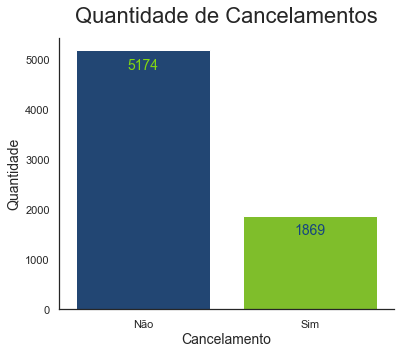

In [20]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", rc=custom_params)
plt.figure(figsize=(6,5))
g = sns.countplot(x='Churn', data=clientes, palette=['#154580','#82D712'])
g.set_title('Quantidade de Cancelamentos', fontsize = 22, pad=15)
g.set_xlabel('Cancelamento', fontsize=14)
g.set_ylabel('Quantidade', fontsize=14)
g.annotate(clientes.query("Churn == 'Não'").shape[0],xy=(0,4800), ha = "center" ,fontsize=14, color='#82D712')
g.annotate(clientes.query("Churn == 'Sim'").shape[0],xy=(1,1500), ha = "center" ,fontsize=14, color='#154580')
plt.show()

# Verificação por serviços

## Analisando a Taxa de cancelamento por seriço de internet

In [21]:
com_internet = clientes.query("ServicoInternet != 'Não'")
sem_internet = clientes.query("ServicoInternet == 'Não'")

In [22]:
sem_internet

,Churn,genero,senior,conjuge,dependentes,permanencia,ServicoTelefonico,MultiplasLinhas,ServicoInternet,SeguroOnline,OnlineBackup,ProtecaoDoDispositivo,SuporteTecnico,StreamingTV,StreamingFilmes,contrato,FaturaOnline,MetodoDePagamento,GastoMensal,GastoTotal,GastoDiario
20,Não,Mulher,1,Sim,Não,50,Sim,Sim,Não,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,UmAno,Não,ChequeEletronico,25.20,1306.30,0.84
23,Não,Mulher,0,Não,Não,3,Sim,Não,Não,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,Mensal,Não,EnvioDeCheque,19.85,57.20,0.66
24,Sim,Mulher,0,Sim,Sim,4,Sim,Não,Não,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,Mensal,Não,EnvioDeCheque,20.35,76.35,0.68
27,Não,Homem,0,Sim,Sim,54,Sim,Não,Não,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,DoisAnos,Não,CartaoCredito,20.40,1090.60,0.68
28,Não,Homem,0,Não,Não,26,Sim,Não,Não,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,UmAno,Sim,TransferenciaBancaria,19.60,471.85,0.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7250,Não,Mulher,0,Não,Não,6,Sim,Não,Não,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,Mensal,Não,CartaoCredito,19.70,129.55,0.66
7252,Não,Mulher,0,Sim,Sim,67,Sim,Não,Não,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,DoisAnos,Sim,TransferenciaBancaria,19.25,1372.90,0.64
7256,Não,Homem,0,Sim,Sim,46,Sim,Não,Não,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,DoisAnos,Não,CartaoCredito,19.75,856.50,0.66
7257,Não,Homem,0,Não,Não,1,Sim,Não,Não,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,SemInternet,Mensal,Não,EnvioDeCheque,18.90,18.90,0.63


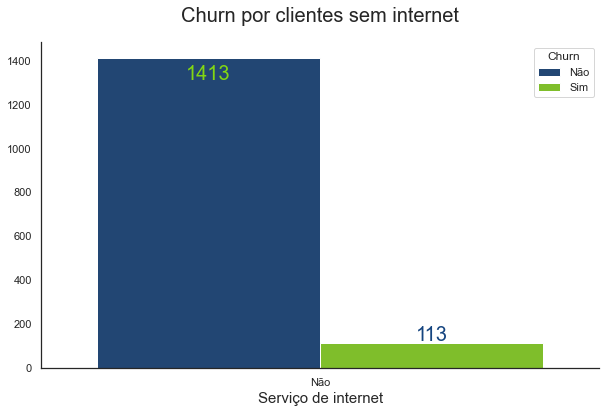

In [23]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=sem_internet, x = 'ServicoInternet', hue = 'Churn',palette=['#154580','#82D712'])
ax.set_title('Churn por clientes sem internet', fontsize=20, pad=20)
ax.set_ylabel('')
ax.set_xlabel('Serviço de internet', fontsize= 15)

ax.annotate(int(sem_internet.query("Churn == 'Não'").shape[0]),
            xy = (-0.2,int(sem_internet.query("Churn == 'Não'").shape[0])-100),
            color = '#82D712',ha ="center", fontsize = 20)
ax.annotate(int(sem_internet.query("Churn == 'Sim'").shape[0]),
            xy = (.2,int(sem_internet.query("Churn == 'Sim'").shape[0])+10),
            color = '#154580',ha ="center", fontsize = 20)
plt.show()

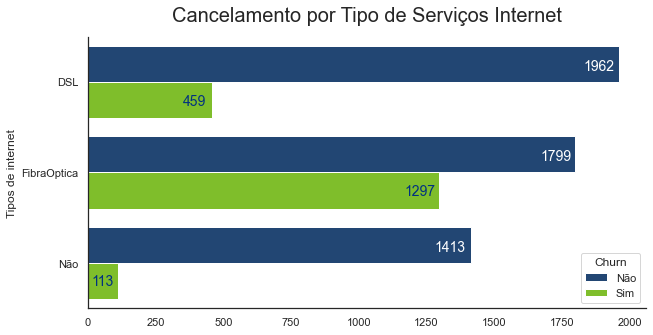

In [24]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
plt.figure(figsize=(10,5))
sns.set_theme(style="white", rc=custom_params)
g = sns.countplot(y='ServicoInternet', hue='Churn', data=clientes, palette=['#154580','#82D712'])
g.set_title('Cancelamento por Tipo de Serviços Internet', fontsize =20, pad=15)
g.set_xlabel('', fontsize=12)
g.set_ylabel('Tipos de internet', fontsize=12)
g.annotate('1962',xy=(1830,-0.13), fontsize=14, color='white')
g.annotate('459',xy=(350,0.26), fontsize=14, color='#003180')
g.annotate('1799',xy=(1670,0.87), fontsize=14, color='white')
g.annotate('1297',xy=(1170,1.25), fontsize=14, color='#003180')
g.annotate('1413',xy=(1280,1.87), fontsize=14, color='white')
g.annotate('113',xy=(15,2.25), fontsize=14, color='#003180')
plt.savefig('Cancelamento por Tipo de Serviço', dpi = 300, bbox_inches = 'tight')
plt.show()

### Analise por outros serviços de internet

In [25]:
clientes['SeguroOnline'].unique()

array(['Não', 'Sim', 'SemInternet'], dtype=object)

In [26]:
px.histogram(clientes['Churn'],x = 'Churn', color = 'Churn',
             text_auto=True, color_discrete_sequence=['#154580','#82D712'],
             height=650,width=550, title='Valores de Churn', 
             )

In [27]:
px.histogram(clientes,x = 'Churn', color = 'ServicoTelefonico',
             text_auto=True, color_discrete_sequence=['#154580','#82D712'],
             height=650,width=550, title='Valores de Churn')

In [28]:
px.data.tips()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [29]:
clientes.query("Churn == 'Não'")['ServicoInternet'].value_counts()

DSL            1962
FibraOptica    1799
Não            1413
Name: ServicoInternet, dtype: int64

In [30]:
fig = go.Figure()

fig.add_trace(go.Histogram(x = clientes.query("Churn == 'Não'")['ServicoTelefonico'], name = 'ServicoTelefonico', 
                           texttemplate = "%{y}", marker={'color' : '#154580'}, bingroup = 1 )
             ) 
fig.add_trace(go.Histogram(histfunc='count', 
                          x = clientes.query("Churn == 'Sim'")['ServicoTelefonico'], name = 'ServicoTelefonico', 
                           texttemplate = "%{y}", marker={'color' : '#82D712'}, bingroup = 1)
             ) 
fig.add_trace(go.Histogram(histfunc='count', 
                          x = clientes.query("Churn == 'Não'")['MultiplasLinhas'], name = 'MultiplasLinhas',
                           texttemplate = "%{y}", marker={'color' : '#154580'}, bingroup = 2)
             ) 
fig.add_trace(go.Histogram(histfunc='count', 
                          x = clientes.query("Churn == 'Sim'")['MultiplasLinhas'], name = 'MultiplasLinhas',
                           texttemplate = "%{y}", marker={'color' : '#82D712'}, bingroup = 2)
             ) 


# fig.update_layout(
#     barmode="overlay")


fig.show()

In [31]:
clientes.query("dependentes == 'Não'")['Churn'].value_counts()

Não    3390
Sim    1543
Name: Churn, dtype: int64

In [32]:
clientes.query("dependentes == 'Sim'")['Churn'].value_counts()

Não    1784
Sim     326
Name: Churn, dtype: int64

In [33]:
fig = go.Figure()
fig.add_trace(go.Histogram(x = clientes['Churn'], 
                           texttemplate = '%{y}', 
                           name = 'Não', marker = {'color':['#154580','#82D712']}))

fig.show()

In [34]:
clientes.columns

Index(['Churn', 'genero', 'senior', 'conjuge', 'dependentes', 'permanencia',
       'ServicoTelefonico', 'MultiplasLinhas', 'ServicoInternet',
       'SeguroOnline', 'OnlineBackup', 'ProtecaoDoDispositivo',
       'SuporteTecnico', 'StreamingTV', 'StreamingFilmes', 'contrato',
       'FaturaOnline', 'MetodoDePagamento', 'GastoMensal', 'GastoTotal',
       'GastoDiario'],
      dtype='object')

In [35]:
fig = make_subplots(rows = 2, cols = 1)

# seguro online
fig.add_trace(go.Histogram(x= clientes.query('SeguroOnline == "Sim"')['Churn'], name = "Seguro Online",
                           marker = {'color':['#154580','#154580']}, texttemplate='%{y}'), 1,1)
fig.add_trace(go.Histogram(x= clientes.query('SeguroOnline == "Não"')['Churn'], name = "Seguro Online",
                           marker = {'color':['#82D712','#82D712']}, texttemplate='%{y}'), 1,1)

# Backup Online
fig.add_trace(go.Histogram(x= clientes.query('OnlineBackup == "Sim"')['Churn'], name = "Backup Online",
                           marker = {'color':['#154580','#154580']}, texttemplate='%{y}'), 1,2)
fig.add_trace(go.Histogram(x= clientes.query('OnlineBackup == "Não"')['Churn'], name = "Backup Online",
                           marker = {'color':['#82D712','#82D712']}, texttemplate='%{y}'), 1,2)

# Backup Online
fig.add_trace(go.Histogram(x= clientes.query('ProtecaoDoDispositivo == "Sim"')['Churn'], name = "Protecao do Dispositivo",
                           marker = {'color':['#154580','#154580']}, texttemplate='%{y}'), 2,1)
fig.add_trace(go.Histogram(x= clientes.query('ProtecaoDoDispositivo == "Não"')['Churn'], name = "Protecao do Dispositivo",
                           marker = {'color':['#82D712','#82D712']}, texttemplate='%{y}'), 2,1)

fig.update_xaxes(title_text = "Seguro Online", row =1, col =1)
fig.update_xaxes(title_text = "Backup Online", row =1, col =2)
fig.update_xaxes(title_text = "Protecao do Dispositivo", row =2, col =1)
fig.update_xaxes(title_text = "Suporte Técnico", row =2, col =2)



fig.update_layout(title= 'Cancelamento por serviço de Internet', height = 850, width = 980)
fig.show()

Exception: The (row, col) pair sent is out of range. Use Figure.print_grid to view the subplot grid. 

In [ ]:
fig , ax = plt.subplots(2,2, sharex=True ,figsize=(18,8))
sns.countplot(x = 'SeguroOnline', data = com_internet, hue = 'Churn', ax = ax[0,0], palette=['#154580','#82D712'])
sns.countplot(x = 'OnlineBackup', data = com_internet, hue = 'Churn', ax = ax[0,1],palette=['#154580','#82D712'])
sns.countplot(x = 'ProtecaoDoDispositivo', data = com_internet, hue = 'Churn', ax = ax[1,0],palette=['#154580','#82D712'])
sns.countplot(x = 'SuporteTecnico', data = com_internet, hue = 'Churn', ax = ax[1,1],palette=['#154580','#82D712'])

lista = ['SeguroOnline', 'OnlineBackup', 'ProtecaoDoDispositivo','SuporteTecnico']

for i in lista:
    for x in range(0,2):
        for y in range(0,2):
            ax[x,y].annotate(int(com_internet.query(f'{i} == "Não" & Churn == "Não"').shape[0]), 
                     xy=(-0.2,int(com_internet.query(f'{i} == "Sim" & Churn == "Não"').shape[0])+120), 
                     fontsize=14,ha ="center" , color='#82D712')
            ax[x,y].annotate(int(com_internet.query(f'{i} == "Não" & Churn == "Sim"').shape[0]), 
                     xy=(0.2,int(com_internet.query(f'{i} == "Não" & Churn == "Sim"').shape[0])-180), 
                     fontsize=14, ha ="center" ,color='#154580')
            ax[x,y].annotate(int(com_internet.query(f'{i} == "Sim" & Churn == "Não"').shape[0]), 
                 xy=(0.8,int(com_internet.query(f'{i} == "Não" & Churn == "Sim"').shape[0])+50), 
                 fontsize=14, ha ="center" ,color='#82D712')
            ax[x,y].annotate(int(com_internet.query(f'{i} == "Sim" & Churn == "Sim"').shape[0]), 
                 xy=(1.2,int(com_internet.query(f'{i} == "Sim" & Churn == "Sim"').shape[0])-180), 
                 fontsize=14, ha ="center" ,color='#154580')

In [ ]:
dd

In [ ]:
fig , ax = plt.subplots(2,2, sharex=True ,figsize=(18,8))
sns.countplot(x = 'SeguroOnline', data = com_internet, hue = 'Churn', ax = ax[0,0], palette=['#154580','#82D712'])
sns.countplot(x = 'OnlineBackup', data = com_internet, hue = 'Churn', ax = ax[0,1],palette=['#154580','#82D712'])
sns.countplot(x = 'ProtecaoDoDispositivo', data = com_internet, hue = 'Churn', ax = ax[1,0],palette=['#154580','#82D712'])
sns.countplot(x = 'SuporteTecnico', data = com_internet, hue = 'Churn', ax = ax[1,1],palette=['#154580','#82D712'])


# Seguro Online
ax[0,0].annotate(int(com_internet.query('SeguroOnline == "Não" & Churn == "Não"').shape[0]), 
                 xy=(-0.2,int(com_internet.query('SeguroOnline == "Sim" & Churn == "Não"').shape[0])+120), 
                 fontsize=14,ha ="center" , color='#82D712')
ax[0,0].annotate(int(com_internet.query('SeguroOnline == "Não" & Churn == "Sim"').shape[0]), 
                 xy=(0.2,int(com_internet.query('SeguroOnline == "Não" & Churn == "Sim"').shape[0])-180), 
                 fontsize=14, ha ="center" ,color='#154580')

ax[0,0].annotate(int(com_internet.query('SeguroOnline == "Sim" & Churn == "Não"').shape[0]), 
                 xy=(0.8,int(com_internet.query('SeguroOnline == "Não" & Churn == "Sim"').shape[0])+50), 
                 fontsize=14, ha ="center" ,color='#82D712')

ax[0,0].annotate(int(com_internet.query('SeguroOnline == "Sim" & Churn == "Sim"').shape[0]), 
                 xy=(1.20,int(com_internet.query('SeguroOnline == "Sim" & Churn == "Sim"').shape[0])-180), 
                 fontsize=14, ha ="center" ,color='#154580')


# Buckup Online
ax[0,1].annotate(int(com_internet.query('OnlineBackup == "Sim" & Churn == "Não"').shape[0]), 
                 xy=(-0.2,int(com_internet.query('OnlineBackup == "Sim" & Churn == "Não"').shape[0])-180), 
                 fontsize=14, ha ="center" ,color='#82D712')

ax[0,1].annotate(int(com_internet.query('OnlineBackup == "Sim" & Churn == "Sim"').shape[0]), 
                 xy=(0.14,int(com_internet.query('OnlineBackup == "Sim" & Churn == "Sim"').shape[0])-150), 
                 fontsize=14, color='#154580')

ax[0,1].annotate(int(com_internet.query('OnlineBackup == "Não" & Churn == "Não"').shape[0]), 
                 xy=(0.73,int(com_internet.query('OnlineBackup == "Não" & Churn == "Não"').shape[0])-180), 
                 fontsize=14, color='#82D712')

ax[0,1].annotate(int(com_internet.query('OnlineBackup == "Não" & Churn == "Sim"').shape[0]), 
                 xy=(1.07,int(com_internet.query('OnlineBackup == "Não" & Churn == "Sim"').shape[0])-180), 
                 fontsize=14, color='#154580')


# Proteção do dispositivo
ax[1,0].annotate(int(com_internet.query('ProtecaoDoDispositivo == "Não" & Churn == "Não"').shape[0]), 
                 xy=(-0.2,int(com_internet.query('ProtecaoDoDispositivo == "Não" & Churn == "Não"').shape[0])-180), 
                 fontsize=14,ha ="center" ,color='#82D712')

ax[1,0].annotate(int(com_internet.query('ProtecaoDoDispositivo == "Não" & Churn == "Sim"').shape[0]), 
                 xy=(0.14,int(com_internet.query('ProtecaoDoDispositivo == "Não" & Churn == "Sim"').shape[0])-150), 
                 fontsize=14, ha ="center" ,color='#154580')

ax[1,0].annotate(int(com_internet.query('ProtecaoDoDispositivo == "Sim" & Churn == "Não"').shape[0]), 
                 xy=(0.73,int(com_internet.query('ProtecaoDoDispositivo == "Sim" & Churn == "Não"').shape[0])-180), 
                 fontsize=14, ha ="center" ,color='#82D712')

ax[1,0].annotate(int(com_internet.query('ProtecaoDoDispositivo == "Sim" & Churn == "Sim"').shape[0]), 
                 xy=(1.11,int(com_internet.query('ProtecaoDoDispositivo == "Sim" & Churn == "Sim"').shape[0])-180), 
                 fontsize=14, ha ="center" ,color='#154580')


# Supoerte Técnico
ax[1,1].annotate(int(com_internet.query('SuporteTecnico == "Sim" & Churn == "Não"').shape[0]), 
                 xy=(-0.2,int(com_internet.query('SuporteTecnico == "Sim" & Churn == "Não"').shape[0])-180), 
                 fontsize=14, ha ="center", color='#82D712')

ax[1,1].annotate(int(com_internet.query('SuporteTecnico == "Sim" & Churn == "Sim"').shape[0]), 
                 xy=(0.14,int(com_internet.query('SuporteTecnico == "Sim" & Churn == "Sim"').shape[0])-150), 
                 fontsize=14, ha ="center" ,color='#154580')

ax[1,1].annotate(int(com_internet.query('SuporteTecnico == "Não" & Churn == "Não"').shape[0]), 
                 xy=(0.73,int(com_internet.query('SuporteTecnico == "Não" & Churn == "Não"').shape[0])-180), 
                 fontsize=14, ha ="center" ,color='#82D712')

ax[1,1].annotate(int(com_internet.query('SuporteTecnico == "Não" & Churn == "Sim"').shape[0]), 
                 xy=(1.085,int(com_internet.query('SuporteTecnico == "Não" & Churn == "Sim"').shape[0])-180), 
                 fontsize=14, color='#154580')



plt.show()

In [ ]:
clientes.query("SeguroOnline == 'SemInternet' & Churn == 'Sim'").shape[0]

In [ ]:
churn[[ 'SeguroOnline', 'OnlineBackup','ProtecaoDoDispositivo', 'SuporteTecnico', 'StreamingTV', 'StreamingFilmes']]

In [ ]:
outros_servico_internet = pd.crosstab(clientes['OnlineBackup'],clientes['Churn'])
# outros_servico_internet['Cancelamento pelo Tipo (%)'] = (outros_servico_internet['Sim'] / (outros_servico_internet['Sim'] + outros_servico_internet['Não'])*100).round(2)
# outros_servico_internet['Cancelamento pelo Total (%)'] = (outros_servico_internet['Sim'] / total_de_churn*100).round(2)
outros_servico_internet

In [ ]:
plt.figure(figsize=(10,7))
g = sns.countplot(x = 'OnlineBackup', data= cancelamento, palette=['#003180'])
g.set_title('Quantidade de Cancelamento por Serviço de Backup Online', fontsize=17, pad=15)
g.set_xlabel('Serviço de Internet', fontsize=13)
g.set_ylabel('Cancelamentos', fontsize=13)
g.annotate(int(outros_servico_internet.loc['Não']['Sim']), xy = (-0.07,outros_servico_internet.loc['Não']['Sim']-70), color='#7FFF00')
g.annotate(int(outros_servico_internet.loc['Sim']['Sim']), xy = (.95,outros_servico_internet.loc['Sim']['Sim']-70), color='#7FFF00')
g.annotate(int(outros_servico_internet.loc['SemInternet']['Sim']), xy = (1.95,outros_servico_internet.loc['SemInternet']['Sim']-70), color='#7FFF00')
g.axhline(total_de_churn, color='k', linestyle='--')
g.annotate(f'Total de Todos os Cancelamentos = {total_de_churn}', xy = (1.3,total_de_churn-100), color='k')
plt.show()

## Analisando a Taxa de cancelamento por serviço de telefone

In [ ]:
servico_telefonico = pd.crosstab(clientes['ServicoTelefonico'], clientes['Churn'])
servico_telefonico['Cancelamento pelo Tipo (%)'] = (servico_telefonico['Sim'] / (servico_telefonico['Sim'] + servico_telefonico['Não'])*100).round(2)
servico_telefonico['Cancelamento pelo Total (%)'] = (servico_telefonico['Sim'] / total_de_churn*100).round(2)
servico_telefonico

In [ ]:
plt.figure(figsize=(10,7))
sns.set_theme(style="white", rc=custom_params)
g = sns.countplot(x = 'ServicoTelefonico', data= cancelamento, palette=['#7FFF00','#003180'])
g.set_title('Quantidade de Cancelamento por Serviço Telefônico', fontsize=17, pad=15)
g.set_xlabel('Serviço de Internet', fontsize=13)
g.set_ylabel('Cancelamentos', fontsize=13)
g.annotate(int(servico_telefonico.loc['Sim']['Sim']), xy = (-0.05,servico_telefonico.loc['Sim']['Sim']+30), color='k')
g.annotate(int(servico_telefonico.loc['Não']['Sim']), xy = (.95,servico_telefonico.loc['Não']['Sim']+30), color='k')
g.axhline(total_de_churn, color='k', linestyle='--')
g.annotate(f'Total de Todos os Cancelamentos = {total_de_churn}', xy = (.7,total_de_churn-100), color='k')
plt.show()

In [ ]:
selecao = (clientes['Churn'] == 'Sim') & (clientes['ServicoTelefonico'] == 'Sim')
print(f'Total de cancelamento de todos os clientes: {total_de_churn}')
print(f'Total de cancelamento dos clientes que usam telefone: {clientes[selecao].shape[0]}')
print(f'Porcentagem dos cancelamentos dos clientes que usam telefone: {round(clientes[selecao].shape[0]/total_de_churn*100,2)}')

# Verificação por Informações gerais

## Análise por Gênero

In [ ]:
churn_sexo = pd.crosstab(clientes['genero'],clientes['Churn'])
churn_sexo['Cancelamento pelo Tipo (%)'] = (churn_sexo['Sim'] / (churn_sexo['Sim'] + churn_sexo['Não'])*100).round(2)
churn_sexo['Cancelamento pelo Total (%)'] = (churn_sexo['Sim'] / total_de_churn*100).round(2)
churn_sexo

In [ ]:
plt.figure(figsize=(10,7))
sns.set_theme(style="white", rc=custom_params)
g = sns.countplot(x = 'genero', data= cancelamento, palette=['#7FFF00','#003180'])
g.set_title('Quantidade de Cancelamento por Gênero', fontsize=17, pad=15)
g.set_xlabel('Gênero', fontsize=13)
g.set_ylabel('Cancelamentos', fontsize=13)
g.annotate(int(churn_sexo.loc['Homem']['Sim']), xy = (-0.05,churn_sexo.loc['Homem']['Sim']+30), color='k')
g.annotate(int(churn_sexo.loc['Mulher']['Sim']), xy = (.95,churn_sexo.loc['Mulher']['Sim']+30), color='k')
g.axhline(total_de_churn, color='k', linestyle='--')
g.annotate(f'Total de Todos os Cancelamentos = {total_de_churn}', xy = (.7,total_de_churn-100), color='k')
plt.show()

## Análisando por Idade

In [ ]:
churn_senior = pd.crosstab(clientes['senior'],clientes['Churn'])
churn_senior.rename(index = {0:'< 65 anos' , 1 : '> 65 anos'}, inplace=True)
churn_senior['Cancelamento pelo Tipo (%)'] = (churn_senior['Sim'] / (churn_senior['Sim'] + churn_senior['Não'])*100).round(2)
churn_senior['Cancelamento pelo Total (%)'] = (churn_senior['Sim'] / total_de_churn*100).round(2)
churn_senior

In [ ]:
plt.figure(figsize=(10,7))
sns.set_theme(style="white", rc=custom_params)
g = sns.countplot(x = 'senior', data= cancelamento, palette=['#7FFF00','#003180'])
g.set_title('Quantidade de Cancelamento por Idade', fontsize=17, pad=15)
g.set_xlabel('Idade', fontsize=13)
g.set_ylabel('Cancelamentos', fontsize=13)
g.annotate(int(churn_senior.loc['< 65 anos']['Sim']), xy = (-0.05,churn_senior.loc['< 65 anos']['Sim']+30), color='k')
g.annotate(int(churn_senior.loc['> 65 anos']['Sim']), xy = (.95,churn_senior.loc['> 65 anos']['Sim']+30), color='k')
g.axhline(total_de_churn, color='k', linestyle='--')
g.annotate(f'Total de Todos os Cancelamentos = {total_de_churn}', xy = (.7,total_de_churn-100), color='k')
plt.show()

## Analise por Cônjuge

In [ ]:
churn_conjuge = pd.crosstab(clientes['conjuge'],clientes['Churn'])
churn_conjuge['Cancelamento pelo Tipo (%)'] = (churn_conjuge['Sim'] / (churn_conjuge['Sim'] + churn_conjuge['Não'])*100).round(2)
churn_conjuge['Cancelamento pelo Total (%)'] = (churn_conjuge['Sim'] / total_de_churn*100).round(2)
churn_conjuge

In [ ]:
plt.figure(figsize=(10,7))
sns.set_theme(style="white", rc=custom_params)
g = sns.countplot(x = 'conjuge', data= cancelamento, palette=['#7FFF00','#003180'])
g.set_title('Quantidade de Cancelamento por Situação Social', fontsize=17, pad=15)
g.set_xlabel('Casado', fontsize=13)
g.set_ylabel('Cancelamentos', fontsize=13)
g.annotate(int(churn_conjuge.loc['Não']['Sim']), xy = (-0.05,churn_conjuge.loc['Não']['Sim']+30), color='k')
g.annotate(int(churn_conjuge.loc['Sim']['Sim']), xy = (.95,churn_conjuge.loc['Sim']['Sim']+30), color='k')
g.axhline(total_de_churn, color='k', linestyle='--')
g.annotate(f'Total de Todos os Cancelamentos = {total_de_churn}', xy = (.7,total_de_churn-100), color='k')
plt.show()

## Analise por dependêntes 

In [ ]:
churn_dependentes = pd.crosstab(clientes['dependentes'],clientes['Churn'])
churn_dependentes['Cancelamento pelo Tipo (%)'] = (churn_dependentes['Sim'] / (churn_dependentes['Sim'] + churn_dependentes['Não'])*100).round(2)
churn_dependentes['Cancelamento pelo Total (%)'] = (churn_dependentes['Sim'] / total_de_churn*100).round(2)
churn_dependentes

In [ ]:
plt.figure(figsize=(10,7))
sns.set_theme(style="white", rc=custom_params)
g = sns.countplot(x = 'dependentes', data= cancelamento, palette=['#7FFF00','#003180'])
g.set_title('Quantidade de Cancelamento por Dependêntes', fontsize=17, pad=15)
g.set_xlabel('Dependêntes', fontsize=13)
g.set_ylabel('Cancelamentos', fontsize=13)
g.annotate(int(churn_dependentes.loc['Não']['Sim']), xy = (-0.05,churn_dependentes.loc['Não']['Sim']+30), color='k')
g.annotate(int(churn_dependentes.loc['Sim']['Sim']), xy = (.95,churn_dependentes.loc['Sim']['Sim']+30), color='k')
g.axhline(total_de_churn, color='k', linestyle='--')
g.annotate(f'Total de Todos os Cancelamentos = {total_de_churn}', xy = (.7,total_de_churn-100), color='k')
plt.show()

In [ ]:
cancelamento.head(2)

# Análise por Gastos

# Outras Análises

In [ ]:
sns.heatmap(clientes.corr())

In [ ]:
x_churn = list(clientes['Churn'].unique())
y_churn = list(clientes['Churn'].value_counts())
x_telefonico = list(clientes['ServicoTelefonico'].unique())
y_telefonico = list(clientes['ServicoTelefonico'].value_counts())
x_internet = list(clientes['ServicoInternet'].unique())
y_internet = list(clientes['ServicoInternet'].value_counts())

In [ ]:
data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data.keys())
values = list(data.values())
fig, axs = plt.subplots(1, 3, figsize=(15,5), sharey=True)
axs[0].bar(x_churn, y_churn)
axs[0].set_title('Quantidade de Churn', fontsize=15, pad=10)
axs[1].bar(x_telefonico, y_telefonico)
axs[1].set_title('Quantidade de Seriços Telefonico', fontsize=15, pad=10)
axs[2].bar(x_internet, y_internet)
axs[2].set_title('Quantidade de Seriços Internet', fontsize=15, pad=10)
# fig.suptitle('Categorical Plotting')
plt.show()

In [ ]:
selecao = clientes['Churn'] == 'Sim'
quantidade_churn = clientes[selecao]
selecao = clientes['ServicoTelefonico'] == 'Sim'
quantidade_telefones = clientes[selecao]
selecao = clientes['ServicoInternet'] == 'SemInternet'
quantidade_internet = clientes[~selecao]

In [ ]:
plt.figure(figsize=(7,6))
ax = sns.countplot(y='ServicoInternet', data = quantidade_internet, hue='Churn',palette=['#7FFF00','#003180'] )
ax.set_title('Quantidade de Cancelamentos por Tipo de Internet', fontsize=20, pad=10)
plt.show()

In [ ]:
plt.figure(figsize=(7,6))
ax = sns.countplot(x='Churn', hue='genero', data=quantidade_internet)
ax.set_title('Quantidade de Cancelamentos por Tipo de Internet', fontsize=20, pad=10)
plt.show()

In [ ]:
quantidade_internet